<a href="https://colab.research.google.com/github/safry4/workflows/blob/main/data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
data_path = "/content/drive/MyDrive/Thesis_data/"
#Install libraries
import os
from IPython.display import clear_output
from google.colab import drive
from google.colab import files
#drive.mount('/content/drive')
drive.mount("/content/drive", force_remount=True)
os.chdir(data_path)


#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import cv2
from google.colab.patches import cv2_imshow

clear_output(wait=False)
print('Done!')

Done!


In [2]:
# !cd /content/

In [3]:
# import os
# os.chdir('/content/')
# !ls

In [4]:
df = pd.read_excel('Thesis_data_cells.xlsx')
df

,Unnamed: 0,Nucleus_Ef_Semi,Nucleus_Ef_Manual,Nucleus_Area_Semi,Nucleus_Area_Semi.1,Cyto_Ef_Semi,Cyto_Ef_Manual,Cyto_Area_Semi,Cyto_Area_Semi.1,Mixed_Ef_Semi,Mixed_Ef_Manual,Mixed_Area_Semi,Mixed_Area_Semi.1
0,1 Cell 1,15.87,16.34,923.0,751.0,7.80,10.95,2654.0,1394.0,9.39,12.33,4041.0,1566.0
1,1 Cell 2,11.49,9.98,1411.0,709.0,7.71,13.45,3439.0,819.0,7.62,8.78,3582.0,2353.0
2,1 Cell 3,15.05,14.47,674.0,1031.0,9.05,12.41,2388.0,943.0,6.83,7.93,2307.0,1147.0
3,1 Cell 4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.72,9.67,4113.0,1564.0
4,1 Cell 1_2,9.36,9.48,1282.0,1209.0,4.39,5.13,5213.0,3715.0,7.75,6.32,5077.0,10157.0
5,1 Cell 2_2,11.02,11.08,996.0,1003.0,0.00,4.49,4379.0,2250.0,4.68,6.82,7786.0,3180.0
6,1 Cell 3_2,11.21,10.73,1133.0,1424.0,0.00,4.60,9035.0,4045.0,3.79,4.27,13280.0,5752.0
7,1 Cell 4_2,11.27,11.28,912.0,1098.0,0.00,0.00,5693.0,3087.0,NaN,NaN,NaN,NaN
8,1 Cell 5_2,9.40,9.08,1509.0,1549.0,0.00,4.15,8772.0,4350.0,NaN,NaN,NaN,NaN
9,2 Cell 1,19.72,18.75,615.0,945.0,6.79,6.74,3797.0,1723.0,8.20,10.06,3786.0,1898.0


In [5]:
#%in nucleus, cyto, mixed
#nucleus

Nucleus_Area_Semi = df['Nucleus_Area_Semi'].dropna()
Nucleus_Area_Manual = df['Nucleus_Area_Semi.1'].dropna()

Cyto_Area_Semi = df['Cyto_Area_Semi'].dropna()
Cyto_Area_Manual = df['Cyto_Area_Semi.1'].dropna()

Mixed_Area_Semi = df['Mixed_Area_Semi'].dropna()
Mixed_Area_Manual = df['Mixed_Area_Semi.1'].dropna()

Nuclei_p = np.abs(np.mean(Nucleus_Area_Semi) - np.mean(Nucleus_Area_Manual))/np.mean(Nucleus_Area_Semi)*100
print("Nuclei_% = ", Nuclei_p)

Cyto_p = np.abs(np.mean(Cyto_Area_Semi) - np.mean(Cyto_Area_Manual))/np.mean(Cyto_Area_Semi)*100
print("Cyto_% = ", Cyto_p)

Mixed_p = np.abs(np.mean(Mixed_Area_Semi) - np.mean(Mixed_Area_Manual))/np.mean(Mixed_Area_Semi)*100
print("Mixed_% = ", Mixed_p)

Nuclei_% =  6.382521181884654
Cyto_% =  33.74047896795443
Mixed_% =  39.64000867448977


In [6]:
#Manual vs Semi
#Nucleus
Nucleus_Ef_Semi = df['Nucleus_Ef_Semi'].dropna()
Nucleus_Ef_Manual = df['Nucleus_Ef_Manual'].dropna()

Cyto_Ef_Semi = df['Cyto_Ef_Semi'].dropna()
Cyto_Ef_Manual = df['Cyto_Ef_Manual'].dropna()

Mixed_Ef_Semi = df['Mixed_Ef_Semi'].dropna()
Mixed_Ef_Manual = df['Mixed_Ef_Manual'].dropna()

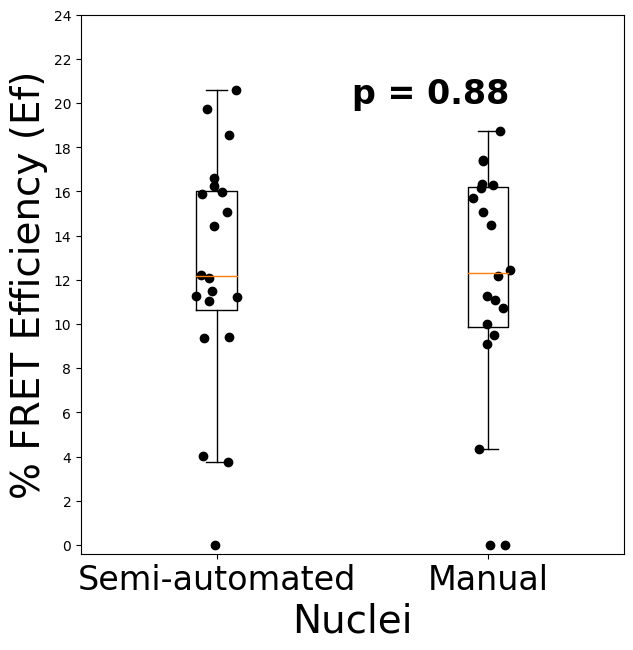

In [7]:
data = [Nucleus_Ef_Semi, Nucleus_Ef_Manual]
dat = pd.DataFrame({'a': pd.Series(Nucleus_Ef_Semi), 'b': pd.Series(Nucleus_Ef_Manual)})

fig = plt.figure(figsize =(7, 7))
ax = fig.add_subplot(111)
#plt.rcParams["figure.figsize"] = [3.50, 3.50]
#plt.rcParams["figure.autolayout"] = False
bp = ax.boxplot(data, patch_artist = False, showfliers=False)
medians = [item.get_ydata()[0] for item in bp['medians']]
for i, d in enumerate(dat):
   y = dat[d]
   x = np.random.normal(i + 1, 0.04, len(y))
   ax.scatter(x, y, color='black')
   ax.set_ylim((-0.4, 17))
medians = [item.get_ydata()[0] for item in bp['medians']]
plt.ylabel("% FRET Efficiency (Ef)", fontsize=28)
plt.yticks(np.arange(0, 25, 2.0))
#plt.xlabel("Sample 3", fontsize=20)

# ax.annotate(round(medians[0],2), xy=(1.15, 5),weight='bold')
# ax.annotate(round(medians[1],2), xy=(2.15, 8),weight='bold')

#ax.hlines(y=4, xmin = 0, xmax = 3, colors='red', ls=':', lw=2, label='vline_single - full height')
#ax.axhline(y = 4, color = 'r', linestyle = ':')

# ax.annotate(round(medians[2],2), xy=(3.25, 3),weight='bold')
# ax.annotate(round(medians[3],2), xy=(4.25, 3),weight='bold')


from scipy.stats import mannwhitneyu
U1, p = mannwhitneyu(Nucleus_Ef_Semi, Nucleus_Ef_Manual, method="exact")
ax.annotate("p = 0.88" , xy=(1.5, 20),weight='bold',fontsize=24)
#p = 0.932300503373326
ax.set_xticklabels(['Semi-automated', 'Manual'], fontsize=24)
plt.xlabel("Nuclei", fontsize=28)
plt.show()

In [8]:
p

0.8830569778434556

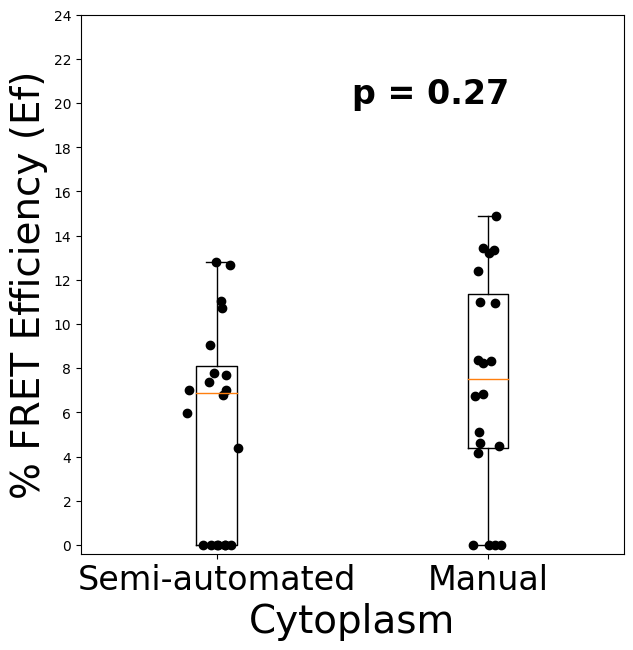

In [9]:
data = [Cyto_Ef_Semi, Cyto_Ef_Manual]
dat = pd.DataFrame({'a': pd.Series(Cyto_Ef_Semi), 'b': pd.Series(Cyto_Ef_Manual)})

fig = plt.figure(figsize =(7, 7))
ax = fig.add_subplot(111)
#plt.rcParams["figure.figsize"] = [3.50, 3.50]
#plt.rcParams["figure.autolayout"] = False
bp = ax.boxplot(data, patch_artist = False, showfliers=False)
medians = [item.get_ydata()[0] for item in bp['medians']]
for i, d in enumerate(dat):
   y = dat[d]
   x = np.random.normal(i + 1, 0.04, len(y))
   ax.scatter(x, y, color='black')
   ax.set_ylim((-0.4, 17))
medians = [item.get_ydata()[0] for item in bp['medians']]
plt.ylabel("% FRET Efficiency (Ef)", fontsize=28)
plt.yticks(np.arange(0, 25, 2.0))
#plt.xlabel("Sample 3", fontsize=20)

# ax.annotate(round(medians[0],2), xy=(1.15, 5),weight='bold')
# ax.annotate(round(medians[1],2), xy=(2.15, 8),weight='bold')

#ax.hlines(y=4, xmin = 0, xmax = 3, colors='red', ls=':', lw=2, label='vline_single - full height')
#ax.axhline(y = 4, color = 'r', linestyle = ':')

# ax.annotate(round(medians[2],2), xy=(3.25, 3),weight='bold')
# ax.annotate(round(medians[3],2), xy=(4.25, 3),weight='bold')


from scipy.stats import mannwhitneyu
U1, p = mannwhitneyu(Cyto_Ef_Semi, Cyto_Ef_Manual, method="exact")
ax.annotate("p = 0.27" , xy=(1.5, 20),weight='bold', fontsize=24)
#p = 0.11350232752844142
ax.set_xticklabels(['Semi-automated', 'Manual'], fontsize=24)
plt.xlabel("Cytoplasm", fontsize=28)
plt.show()

In [10]:
p

0.2766270614459423

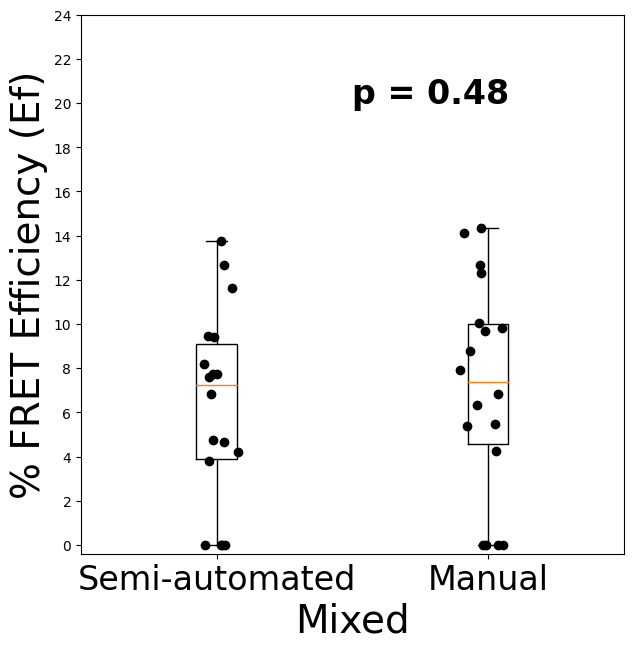

In [11]:
data = [Mixed_Ef_Semi, Mixed_Ef_Manual]
dat = pd.DataFrame({'a': pd.Series(Mixed_Ef_Semi), 'b': pd.Series(Mixed_Ef_Manual)})

fig = plt.figure(figsize =(7, 7))
ax = fig.add_subplot(111)
#plt.rcParams["figure.figsize"] = [3.50, 3.50]
#plt.rcParams["figure.autolayout"] = False
bp = ax.boxplot(data, patch_artist = False, showfliers=False)
medians = [item.get_ydata()[0] for item in bp['medians']]
for i, d in enumerate(dat):
   y = dat[d]
   x = np.random.normal(i + 1, 0.04, len(y))
   ax.scatter(x, y, color='black')
   ax.set_ylim((-0.4, 17))
medians = [item.get_ydata()[0] for item in bp['medians']]
plt.ylabel("% FRET Efficiency (Ef)", fontsize=28)
plt.yticks(np.arange(0, 25, 2.0))
#plt.xlabel("Sample 3", fontsize=20)

# ax.annotate(round(medians[0],2), xy=(1.15, 5),weight='bold')
# ax.annotate(round(medians[1],2), xy=(2.15, 8),weight='bold')

#ax.hlines(y=4, xmin = 0, xmax = 3, colors='red', ls=':', lw=2, label='vline_single - full height')
#ax.axhline(y = 4, color = 'r', linestyle = ':')

# ax.annotate(round(medians[2],2), xy=(3.25, 3),weight='bold')
# ax.annotate(round(medians[3],2), xy=(4.25, 3),weight='bold')


from scipy.stats import mannwhitneyu
U1, p = mannwhitneyu(Mixed_Ef_Semi, Mixed_Ef_Manual, method="exact")
ax.annotate("p = 0.48" , xy=(1.5, 20),weight='bold', fontsize=24)
#p = 0.21694507762619214
ax.set_xticklabels(['Semi-automated', 'Manual'], fontsize=24)
plt.xlabel("Mixed", fontsize=28)
plt.show()

In [12]:
p

0.4812295153329559

In [13]:
#exp 1
Nucleus_Ef_Semi_1exp = df['Nucleus_Ef_Semi'][0:9].dropna()
Cyto_Ef_Semi_1exp = df['Cyto_Ef_Semi'][0:9].dropna()
Mixed_Ef_Semi_1exp = df['Mixed_Ef_Semi'][0:9].dropna()

#exp 2
Nucleus_Ef_Semi_2exp = df['Nucleus_Ef_Semi'][9:17].dropna()
Cyto_Ef_Semi_2exp = df['Cyto_Ef_Semi'][9:17].dropna()
Mixed_Ef_Semi_2exp = df['Mixed_Ef_Semi'][9:17].dropna()

#exp 3
Nucleus_Ef_Semi_3exp = df['Nucleus_Ef_Semi'][17:].dropna()
Cyto_Ef_Semi_3exp = df['Cyto_Ef_Semi'][17:].dropna()
Mixed_Ef_Semi_3exp = df['Mixed_Ef_Semi'][17:].dropna()
Nucleus_Ef_Semi_3exp

17    16.62
18    15.96
19    12.08
20    12.24
21    16.23
22    14.44
Name: Nucleus_Ef_Semi, dtype: float64

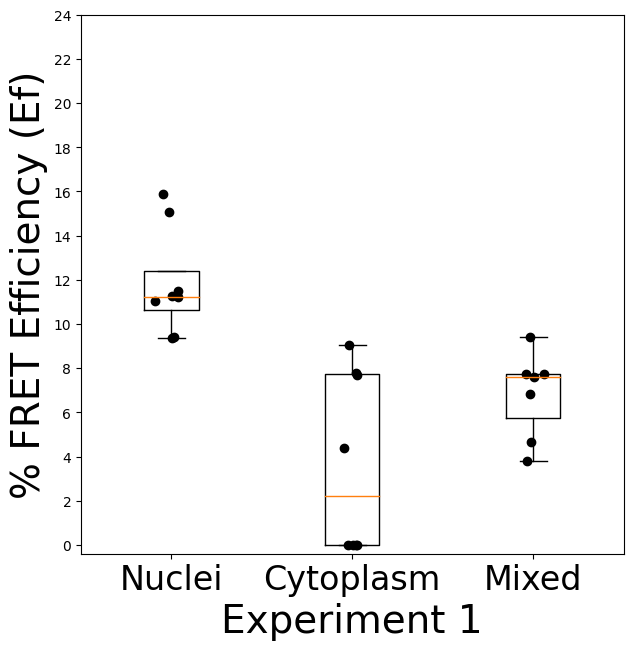

In [14]:
data = [Nucleus_Ef_Semi_1exp, Cyto_Ef_Semi_1exp, Mixed_Ef_Semi_1exp]
dat = pd.DataFrame({'a': pd.Series(Nucleus_Ef_Semi_1exp), 'b': pd.Series(Cyto_Ef_Semi_1exp),'c': pd.Series(Mixed_Ef_Semi_1exp)})

fig = plt.figure(figsize =(7, 7))
ax = fig.add_subplot(111)
#plt.rcParams["figure.figsize"] = [3.50, 3.50]
#plt.rcParams["figure.autolayout"] = False
bp = ax.boxplot(data, patch_artist = False, showfliers=False)
medians = [item.get_ydata()[0] for item in bp['medians']]
for i, d in enumerate(dat):
   y = dat[d]
   x = np.random.normal(i + 1, 0.04, len(y))
   ax.scatter(x, y, color='black')
   ax.set_ylim((-0.4, 17))
medians = [item.get_ydata()[0] for item in bp['medians']]
plt.ylabel("% FRET Efficiency (Ef)", fontsize=28)
plt.yticks(np.arange(0, 25, 2.0))
#plt.xlabel("Sample 3", fontsize=20)

# ax.annotate(round(medians[0],2), xy=(1.15, 5),weight='bold')
# ax.annotate(round(medians[1],2), xy=(2.15, 8),weight='bold')

#ax.hlines(y=4, xmin = 0, xmax = 3, colors='red', ls=':', lw=2, label='vline_single - full height')
#ax.axhline(y = 4, color = 'r', linestyle = ':')

# ax.annotate(round(medians[2],2), xy=(3.25, 3),weight='bold')
# ax.annotate(round(medians[3],2), xy=(4.25, 3),weight='bold')


# from scipy.stats import mannwhitneyu
# U1, p = mannwhitneyu(Normoxia, Hypoxia, method="exact")
# ax.annotate("***" % (round(p,3)) , xy=(2.0, 12),weight='bold')
ax.set_xticklabels(['Nuclei', 'Cytoplasm', 'Mixed'], fontsize=24)
plt.xlabel("Experiment 1", fontsize=28)
plt.show()

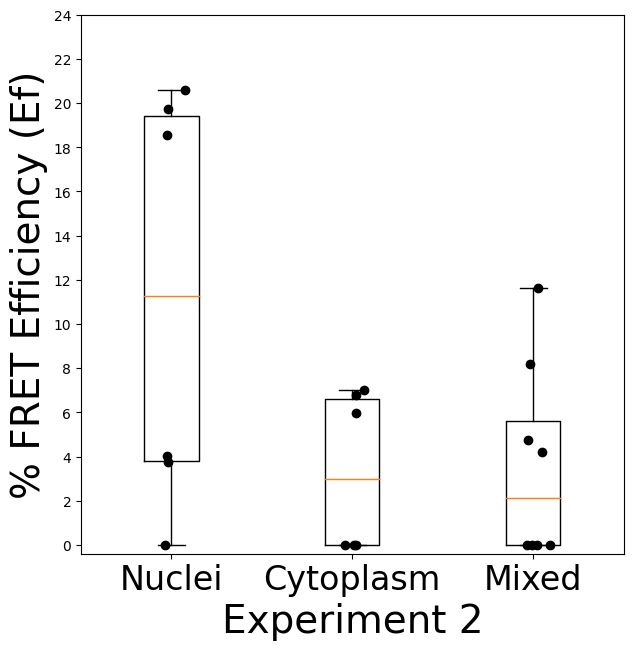

In [15]:
data = [Nucleus_Ef_Semi_2exp, Cyto_Ef_Semi_2exp, Mixed_Ef_Semi_2exp]
dat = pd.DataFrame({'a': pd.Series(Nucleus_Ef_Semi_2exp), 'b': pd.Series(Cyto_Ef_Semi_2exp),'c': pd.Series(Mixed_Ef_Semi_2exp)})

fig = plt.figure(figsize =(7, 7))
ax = fig.add_subplot(111)
#plt.rcParams["figure.figsize"] = [3.50, 3.50]
#plt.rcParams["figure.autolayout"] = False
bp = ax.boxplot(data, patch_artist = False, showfliers=False)
medians = [item.get_ydata()[0] for item in bp['medians']]
for i, d in enumerate(dat):
   y = dat[d]
   x = np.random.normal(i + 1, 0.04, len(y))
   ax.scatter(x, y, color='black')
   ax.set_ylim((-0.4, 17))
medians = [item.get_ydata()[0] for item in bp['medians']]
plt.ylabel("% FRET Efficiency (Ef)", fontsize=28)
plt.yticks(np.arange(0, 25, 2.0))
#plt.xlabel("Sample 3", fontsize=20)

# ax.annotate(round(medians[0],2), xy=(1.15, 5),weight='bold')
# ax.annotate(round(medians[1],2), xy=(2.15, 8),weight='bold')

#ax.hlines(y=4, xmin = 0, xmax = 3, colors='red', ls=':', lw=2, label='vline_single - full height')
#ax.axhline(y = 4, color = 'r', linestyle = ':')

# ax.annotate(round(medians[2],2), xy=(3.25, 3),weight='bold')
# ax.annotate(round(medians[3],2), xy=(4.25, 3),weight='bold')


# from scipy.stats import mannwhitneyu
# U1, p = mannwhitneyu(Normoxia, Hypoxia, method="exact")
# ax.annotate("***" % (round(p,3)) , xy=(2.0, 12),weight='bold')
ax.set_xticklabels(['Nuclei', 'Cytoplasm', 'Mixed'], fontsize=24)
plt.xlabel("Experiment 2", fontsize=28)
plt.show()

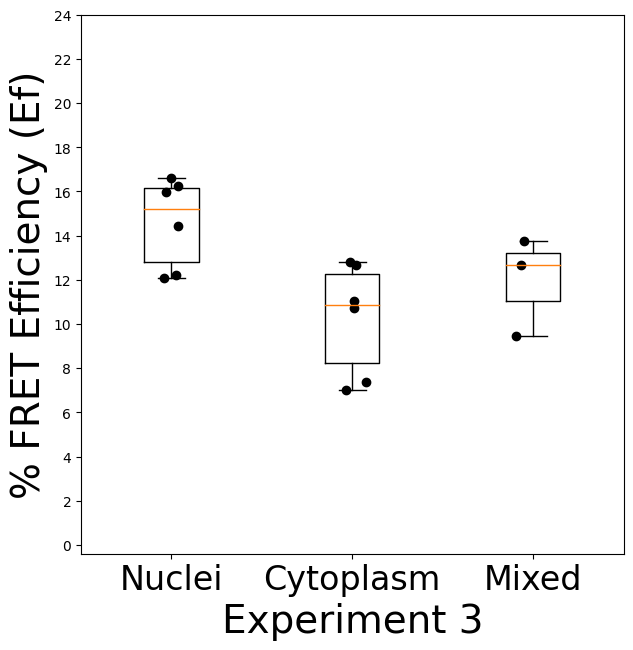

In [16]:
data = [Nucleus_Ef_Semi_3exp, Cyto_Ef_Semi_3exp, Mixed_Ef_Semi_3exp]
dat = pd.DataFrame({'a': pd.Series(Nucleus_Ef_Semi_3exp), 'b': pd.Series(Cyto_Ef_Semi_3exp),'c': pd.Series(Mixed_Ef_Semi_3exp)})

fig = plt.figure(figsize =(7, 7))
ax = fig.add_subplot(111)
#plt.rcParams["figure.figsize"] = [3.50, 3.50]
#plt.rcParams["figure.autolayout"] = False
bp = ax.boxplot(data, patch_artist = False, showfliers=False)
medians = [item.get_ydata()[0] for item in bp['medians']]
for i, d in enumerate(dat):
   y = dat[d]
   x = np.random.normal(i + 1, 0.04, len(y))
   ax.scatter(x, y, color='black')
   ax.set_ylim((-0.4, 17))
medians = [item.get_ydata()[0] for item in bp['medians']]
plt.ylabel("% FRET Efficiency (Ef)", fontsize=28)
plt.yticks(np.arange(0, 25, 2.0))
#plt.xlabel("Sample 3", fontsize=20)

# ax.annotate(round(medians[0],2), xy=(1.15, 5),weight='bold')
# ax.annotate(round(medians[1],2), xy=(2.15, 8),weight='bold')

#ax.hlines(y=4, xmin = 0, xmax = 3, colors='red', ls=':', lw=2, label='vline_single - full height')
#ax.axhline(y = 4, color = 'r', linestyle = ':')

# ax.annotate(round(medians[2],2), xy=(3.25, 3),weight='bold')
# ax.annotate(round(medians[3],2), xy=(4.25, 3),weight='bold')


# from scipy.stats import mannwhitneyu
# U1, p = mannwhitneyu(Normoxia, Hypoxia, method="exact")
# ax.annotate("***" % (round(p,3)) , xy=(2.0, 12),weight='bold')
ax.set_xticklabels(['Nuclei', 'Cytoplasm', 'Mixed'], fontsize=24)
plt.xlabel("Experiment 3", fontsize=28)
plt.show()

In [17]:
!ls

Thesis_data_cells.xlsx	TissueExample2.xlsx  TissueExample4.xlsx
TissueExample1.xlsx	TissueExample3.xlsx


In [18]:
df1 = pd.read_excel('TissueExample1.xlsx')
df1

,label,area,fret_eff,dist
0,444,10110,17.182826,7.538165
1,148,9924,10.467806,8.294342
2,309,9685,12.721314,7.995102
3,311,9517,19.773326,7.324891
4,149,9515,14.038461,7.844985
5,150,9083,20.344931,7.281500
6,8,8830,15.921972,7.653773
7,7,8540,6.550725,9.032523
8,306,7556,10.039317,8.358970
9,443,6351,12.593011,8.010582


(0.0, 20.0)

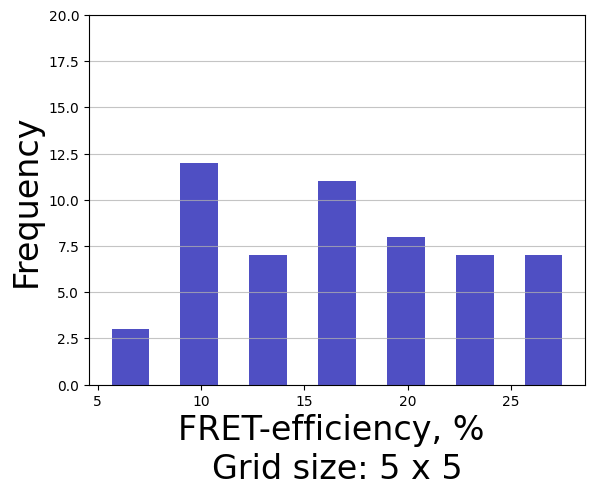

In [19]:
import matplotlib.pyplot as plt

# An "interface" to matplotlib.axes.Axes.hist() method
n, bins, patches = plt.hist(x=df1["fret_eff"], bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.55)
plt.grid(axis='y', alpha=0.75)
# plt.xlabel('FRET-efficiency, %', fontsize = 24)
plt.ylabel('Frequency', fontsize = 24)
plt.xlabel('FRET-efficiency, % \nGrid size: 5 x 5', fontsize = 24)

# ax.set_xticklabels(['FRET-efficiency, %'], fontsize=24)
#plt.title('My Very Own Histogram')
# plt.text(23, 45, r'$\mu=15, b=3$')
maxfreq = n.max()
# Set a clean upper y-axis limit.
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)

In [25]:
df2 = pd.read_excel('TissueExample2.xlsx')
df2

,label,area,fret_eff,dist
0,7,2672,5.334259,9.367300
1,482,2508,14.403656,7.805938
2,408,2508,10.913150,8.230102
3,409,2451,20.153219,7.295922
4,87,2435,4.030838,9.837484
...,...,...,...,...
102,428,28,25.017857,6.964329
103,876,28,15.589643,7.685780
104,63,28,10.021429,8.361732
105,331,28,5.904643,9.200761


(0.0, 30.0)

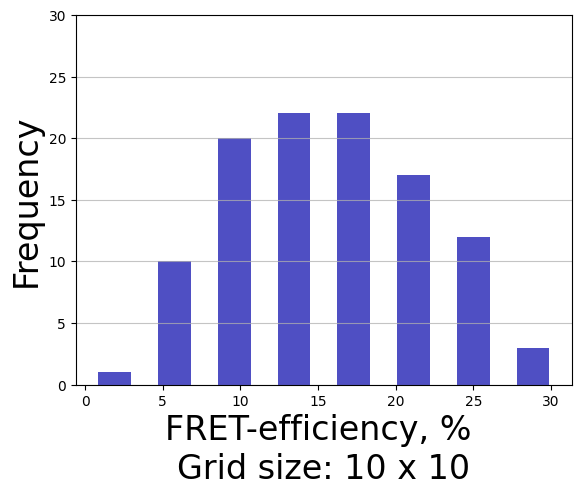

In [26]:


# An "interface" to matplotlib.axes.Axes.hist() method
n, bins, patches = plt.hist(x=df2["fret_eff"], bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.55)
plt.grid(axis='y', alpha=0.75)
# plt.xlabel('FRET-efficiency, %', fontsize = 24)
plt.ylabel('Frequency', fontsize = 24)
plt.xlabel('FRET-efficiency, % \nGrid size: 10 x 10', fontsize = 24)

# ax.set_xticklabels(['FRET-efficiency, %'], fontsize=24)
#plt.title('My Very Own Histogram')
# plt.text(23, 45, r'$\mu=15, b=3$')
maxfreq = n.max()
# Set a clean upper y-axis limit.
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)

In [27]:
df3 = pd.read_excel('TissueExample3.xlsx')
df3

,label,area,fret_eff,dist
0,1050,42,30.755476,6.640057
1,756,184,28.781902,6.745381
2,380,42,28.231667,6.775802
3,276,28,27.338571,6.826258
4,64,372,26.857527,6.854018
...,...,...,...,...
255,207,494,0.000000,NaN
256,169,369,0.000000,NaN
257,170,446,0.000000,NaN
258,206,409,0.000000,NaN


(0.0, 50.0)

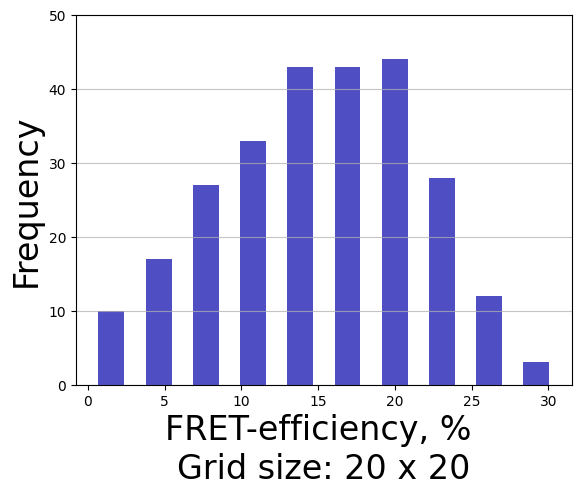

In [28]:
# An "interface" to matplotlib.axes.Axes.hist() method
n, bins, patches = plt.hist(x=df3["fret_eff"], bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.55)
plt.grid(axis='y', alpha=0.75)
# plt.xlabel('FRET-efficiency, %', fontsize = 24)
plt.ylabel('Frequency', fontsize = 24)
plt.xlabel('FRET-efficiency, % \nGrid size: 20 x 20', fontsize = 24)

# ax.set_xticklabels(['FRET-efficiency, %'], fontsize=24)
#plt.title('My Very Own Histogram')
# plt.text(23, 45, r'$\mu=15, b=3$')
maxfreq = n.max()
# Set a clean upper y-axis limit.
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)

In [29]:
df4 = pd.read_excel('TissueExample4.xlsx')
df4

,label,area,fret_eff,dist
0,1882,27,32.178889,6.567403
1,1779,33,30.328788,6.662354
2,1848,35,30.113143,6.673719
3,270,40,29.899500,6.685043
4,835,40,29.135000,6.726112
...,...,...,...,...
898,488,40,0.000000,NaN
899,546,28,0.000000,NaN
900,300,28,0.000000,NaN
901,435,35,0.000000,NaN


(0.0, 110.0)

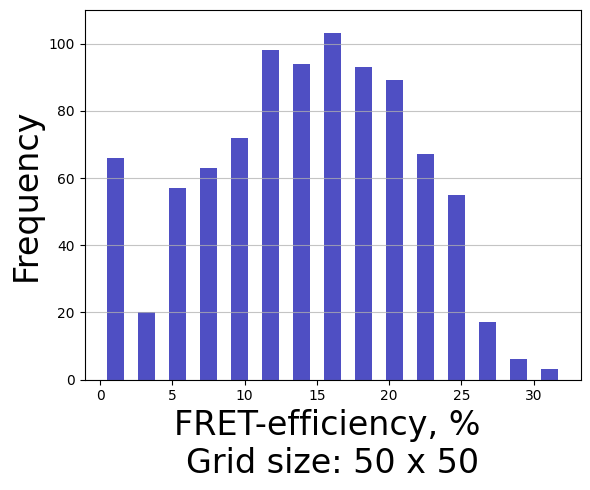

In [30]:
# An "interface" to matplotlib.axes.Axes.hist() method
n, bins, patches = plt.hist(x=df4["fret_eff"], bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.55)
plt.grid(axis='y', alpha=0.75)
# plt.xlabel('FRET-efficiency, %', fontsize = 24)
plt.ylabel('Frequency', fontsize = 24)
plt.xlabel('FRET-efficiency, % \nGrid size: 50 x 50', fontsize = 24)

# ax.set_xticklabels(['FRET-efficiency, %'], fontsize=24)
#plt.title('My Very Own Histogram')
# plt.text(23, 45, r'$\mu=15, b=3$')
maxfreq = n.max()
# Set a clean upper y-axis limit.
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)